Hola !

Mi nombre es Oscar Flores y me toca revisar tu proyecto de hoy. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo! El notebook está casi listo, tan solo falta que verifiques la existencia de outliers antes de hacer el test de hipótesis y los remuevas si es necesario.
    
Saludos!
</div>

----

#  Proyecto Sprint 6

## Proposito del proyecto

Estoy trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Mi tarea es encontrar patrones en la información disponible. Quiero comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizaré los datos de los competidores y probaré una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

# 1.- Importar las librerias

In [2]:
#Primero importaremos las librerias que nos pueden ser utiles en nuestro analisis.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats as st
import datetime

# 2.- Carguemos los dataframes

In [3]:
#Tenemos para este proyecto tres archivos para cargar.
res_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
res_4 = pd.read_csv('/datasets/project_sql_result_04.csv')

#El siguiente dataframe nos servira para probar la hipotesis pero de momento vamos a dejarlo ahi.
res_7 = pd.read_csv('/datasets/project_sql_result_07.csv')

# 3.- Analizemos los dataframes

## Primer Dataframe (res_1)

In [4]:
#Hechemos un vistazo a informacion general, tipo de datos, duplicados, y una muestra de datos de los dos dataframes

#Empezemos con res_1
res_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
#Tipo de datos
res_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
#Revisemos duplicados
res_1.duplicated().sum()

0

In [7]:
#Y una muestra
res_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Podemos ver que no hay datos que sean problematicos de momento. Trata sobre un dataframe que nos da el nombre de empresa y la cantidad de viajes realizados el 15 y 16 de noviembre de 2017. Tampoco se ve de momento datos que corregir, pues los tipos de datos estan precisos y no hay valores ausentes o duplicados.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

## Segundo Dataframe (res_4)

In [8]:
#Ahora hechemosle un vistazo a res_4
res_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
#Ver descripcion sobre los datos
res_4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
#Revisar duplicados
res_4.duplicated().sum()

0

In [11]:
#Imprimir muestra de datos
res_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Podemos ver que este dataframe tampoco es problematico: No tiene ni duplicados, valores ausentes, o tipos de datos no apropiados. Vemos que se trata de la ubicacion de entrega de los taxis y la cantidad promedio de carreras por ubicacion en 2017. Lo que puede resaltar es que al estar en promedio de viajes se puede ver que no son numeros enteros, lo cual hace surgir dudas como: "Como puede haber 1/2 de viaje?". De todas formas nuestro objetivo de analisis no interfiere con esta duda, por lo cual se puede trabajar con esta inconsistencia, es decir, no hay necesidad de troncar.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

# 3.- Estudio y uso de datos

Habiendo visto los datos y analizado sus contenidos, hagamos arreglos y uso de ellos. Vamos a hacer graficos, corregir datos de ser necesario y hacer conlusiones a partir de aquello. Queremos saber los barrios mas populares, las empresas mas populares dependiendo de la ubicacion de entrega, los diez barrios principales por numero de finalizaciones.

##  4.1 Grafico de empresas de taxi y numero de viajes

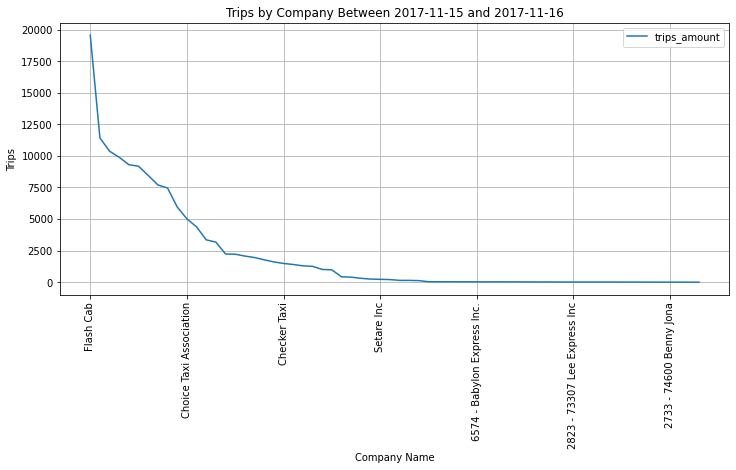

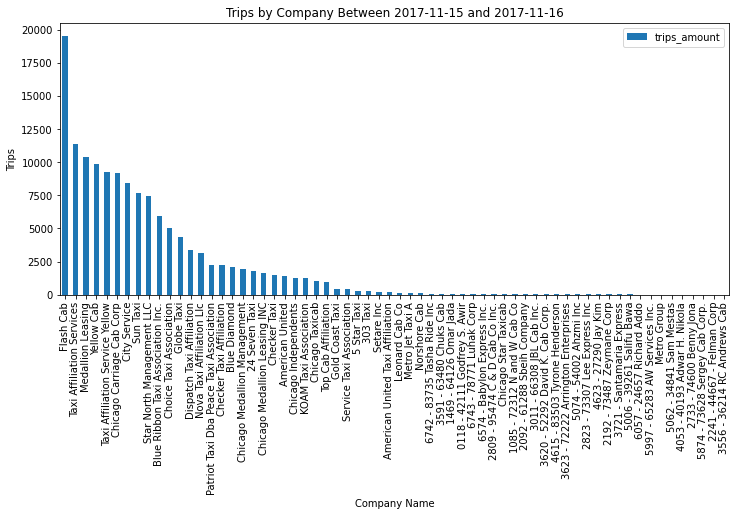

In [12]:
#Haremos un groupby de las empresas y sus numeros de viajes

trips_by_company = (res_1.groupby('company_name').sum()[['trips_amount']]).sort_values(by='trips_amount', ascending=False)

#Creamos un grafico lineal y sus etiquetas respectivas

trips_by_company.plot(grid= True, figsize=(12, 5))
plt.xlabel('Company Name')
plt.ylabel('Trips')
plt.xticks(rotation=90)
plt.title('Trips by Company Between 2017-11-15 and 2017-11-16')
plt.show()

#Creamos un histograma asi mismo

trips_by_company.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Company Name')
plt.ylabel('Trips')
plt.xticks(rotation=90)
plt.title('Trips by Company Between 2017-11-15 and 2017-11-16')
plt.show()

In [13]:
#Separaremos las mas populares
most_popular_companies = trips_by_company.head(10)
most_popular_companies

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


Podemos concluir en este dataframe que las empresas mas populares (10) son, en orden descendente: Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, y Blue Ribbon Taxi Association Inc.

Se puede ver que "Flash Cab" tiene mucha popularidad, pues les tiene una delantera significativa en cuanto a cantidad de viajes o carreras a las demas empresas. Tambien sacamos como conclusion que un histograma fue el mas preciso para poder demostrar los valores que necesitamos.

## 4.2 Graficos del segundo dataframe

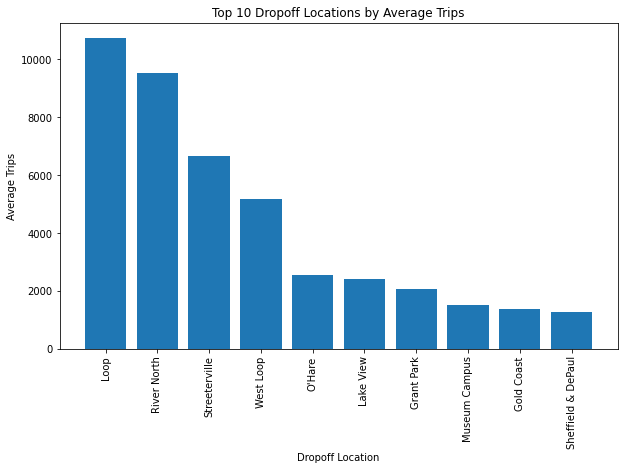

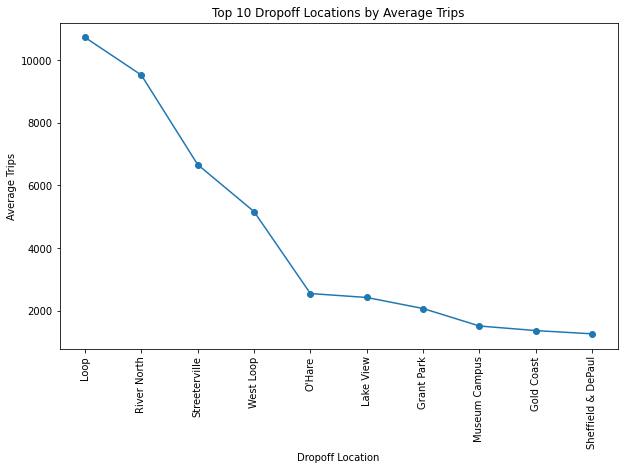

In [14]:
#Ordenemos el dataframe

res_4_sorted = res_4.sort_values(by='average_trips', ascending=False)

#Separemos las locaciones mas populares

top_dropoff_locations = res_4_sorted.head(10)

#Hagamos un histograma

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.bar(top_dropoff_locations['dropoff_location_name'], top_dropoff_locations['average_trips'])
ax.set_title('Top 10 Dropoff Locations by Average Trips')
ax.set_xlabel('Dropoff Location')
ax.set_ylabel('Average Trips')
plt.xticks(rotation=90)
plt.show()

#Hagamos un diagrama lineal

fig, ax = plt.subplots(figsize=(10, 6)) # set the figure size
ax.plot(top_dropoff_locations['dropoff_location_name'], top_dropoff_locations['average_trips'], marker='o')
ax.set_title('Top 10 Dropoff Locations by Average Trips')
ax.set_xlabel('Dropoff Location')
ax.set_ylabel('Average Trips')
plt.xticks(rotation=90)
plt.show()

Podemos ver que las ubicaciones de entrega mas populares de noviembre de 2017 son, en orden descendente: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul. 

La diferencia de viajes promedio por ubicacion es muy grande, al igual que pudimos ver en los anteriores graficos. Las 4 mejores ubicaciones tienen numeros que superan exuberantemente a el resto, pues hay diferencias de miles.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente, las descripciones de los datos están muy bien y los gráficos tienen todo lo necesario.
</div>

# 5.- Prueba de hipotesis

El dataframe res_7 contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

Probemos la siguiente hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Sabiendo que la hipotesis nula es la que busca la igualdad, entonces las hipotesis nula y alternativa serian las siguientes:

Hipotesis Nula: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos".

Hipotesis Alternativa: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [15]:
#Hechemos un vistazo a res_7
res_7

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
#Veamos los valores de weather_conditions, ya que se necesita para probar la hipotesis
res_7['weather_conditions'].nunique()

2

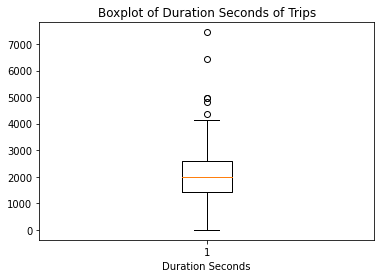

In [19]:
#Hagamos un boxplot para ver si hay valores atipicos
plt.boxplot(res_7['duration_seconds'], vert=True)
plt.title('Boxplot of Duration Seconds of Trips')
plt.xlabel('Duration Seconds')
plt.show()

In [33]:
#Removamos los valores atipicos
Q1 = res_7['duration_seconds'].quantile(0.25)
Q3 = res_7['duration_seconds'].quantile(0.75)
below = Q1 - (1.5 * IQR)
above = Q3 + (1.5 * IQR)
IQR = Q3 - Q1


new_res_7 = res_7.query('@below < duration_seconds < @above')

In [35]:
#Sabiendo que solo hay dos valores (Good, Bad), "Bad" significando que llueve, haremos la prueba de hipotesis.
rainy_days = (new_res_7.query('weather_conditions == "Bad"'))[['duration_seconds']]
normal_days = (new_res_7.query('weather_conditions == "Good"'))[['duration_seconds']]

#Establezcamos el valor umbral
alpha = 0.5

#Veamos las varianzas de ambos valores
print(f'La varianza de los dias lluviosos es: {np.var(rainy_days)}')
print(f'La varianza de los dias normales es: {np.var(normal_days)}')

#Usamos la funcion de scipy st.ttest_ind().
result = st.ttest_ind(rainy_days, normal_days, equal_var=False)

#Finalmente, comprobemos
print('p-value:', result.pvalue)

if alpha > result.pvalue:
    print("Rechazamos la Hipotesis Nula, entonces : La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No Rechazamos la Hipotesis Nula, entonces: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos.")

La varianza de los dias lluviosos es: duration_seconds    483684.220343
dtype: float64
La varianza de los dias normales es: duration_seconds    497572.525999
dtype: float64
p-value: [6.64430275e-13]
Rechazamos la Hipotesis Nula, entonces : La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El análisis es correcto, pero antes de realizar el test de hipótesis es importante ver si existen outliers. Realiza un test y/o grafica un boxplot para los datos de días lluviosos y normales.
</div>

<div class="alert alert-block alert-info">
<b>Tienes Razon! Ya lo agregue y elimine los valores atipicos :)</b> <a class="tocSkip"></a>
</div>

Podemos ver, a traves de la herramiente stats de scipy, que la duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sabados lluviosos. Que podemos concluir a traves de esto? Podemos ver que los clientes normalmente tienen un diferente tiempo de llegada los dias lluviosos, probablemente se demoren mas, pero no es de interes del analisis sacar esa especifica informacion.

Para poder sacar este resultado, usamos la funcion st.test_ind() de scipy, que nos ayuda a comparar dos promedios estableciendo si su varianza es igual. 

# Conclusion Final

Podemos ver que las mejores empresas de taxis enfocandonos entre 2017-11-15 y 2017-11-16 son, en orden descendente: Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, y Blue Ribbon Taxi Association Inc. 

Hay que tener en cuenta que solo se tomo en cuenta dos dias, puede que estos numeros puedan fluir de diferente manera dependiendo del tiempo, a lo mejor una de las empresas tomo cierta publicidad despues que ayudo a mejorar la demanda de sus servicios. Tambien nos dimos cuenta que los valores fueron dispersos, pues los valores mas altos ganan por una cantidad grande, demostrando su desviacion estandar elevada. 

Luego pudimos ver que las mejores locaciones de entrega en noviembre de 2017 fueron, en orden descendente:  Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.

Tambien logramos ver que los valores mas altos estaban muy por encima del resto, tomando una delantera por miles. Esto indica que los taxis pueden tener mejor rotacion alrededor de las mejores locaciones por lo que significa mejor ingreso si se quedan cerca de estas ubicaciones. 

Finalmente comprobamos la hipotesis dada que indicaba lo siguiente: "La duracion promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sabados lluviosos". Se comprobo que la hipotesis era acertada, pues a traves de las herramientas stats de scipy logramos ver que diferian. 

Finalmente, estableciendo estos patrones, recomiendo que a preferencia de los pasajeros se tenga en cuenta mayormente las locaciones mas escogidas ya mencionadas, pues dado a su gran demanda el mercado es amplio y existe disponibilidad. Tambien podemos ver que puede ser preciso indicar que los tiempos de entrega a la ubicacion cambian los sabados que si son lluviosos.